<a href="https://colab.research.google.com/github/devmitrasharmaa/PRODIGY_DS_02/blob/main/Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df= pd.read_csv('insurance_data.csv')

In [214]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


#Columns
* **Numerical**: Age,bmi,bloodpressure, claim
* **Categorical**: gender, diabetic, children, smoker, region

#**UNIVARIATE ANALYSIS**

## *Age*
###Exists Between 18-60

In [215]:
df['age'].describe()


count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [216]:
df[df['age'].isnull()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


<Axes: ylabel='Density'>

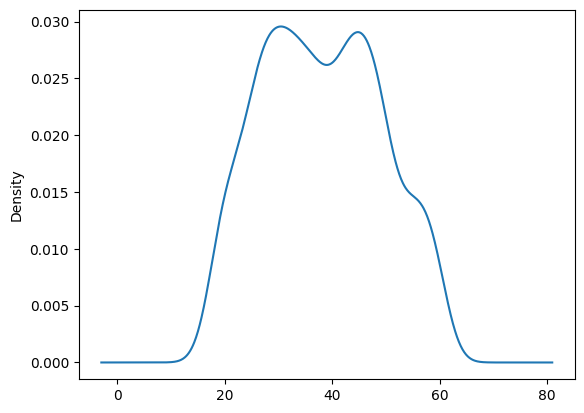

In [217]:
df['age'].plot(kind='kde')

<Axes: >

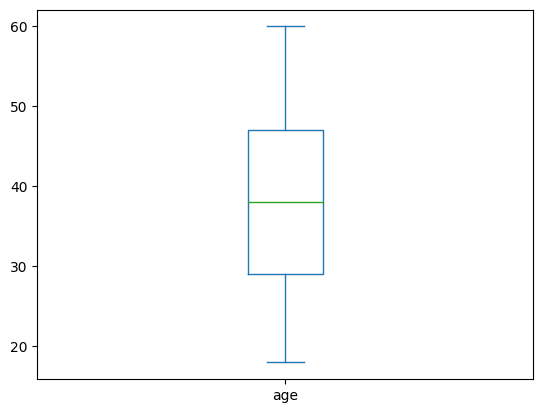

In [218]:
df['age'].plot(kind='box')

## *BMI*
less than 18.5 falls within the underweight range,

If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.

If your BMI is 25.0 to 29.9, it falls within the overweight range.

If your BMI is 30.0 or higher, it falls within the obese range.

In [219]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: >

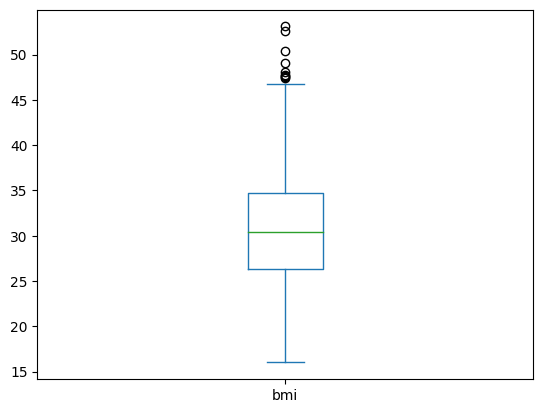

In [220]:
df['bmi'].plot(kind='box')

<Axes: ylabel='Density'>

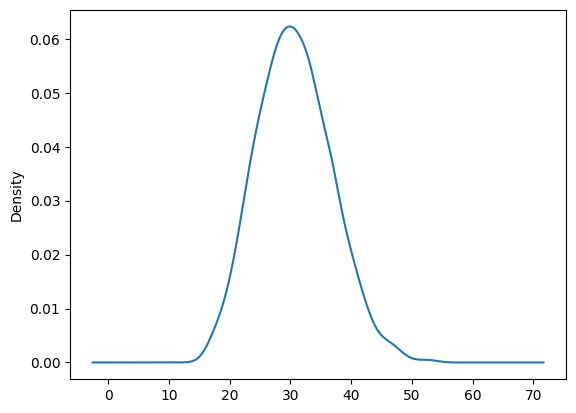

In [221]:
df['bmi'].plot(kind='kde')

## *Bloodpressure*
110-130 bloodperssure can be considered normal

In [222]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Density'>

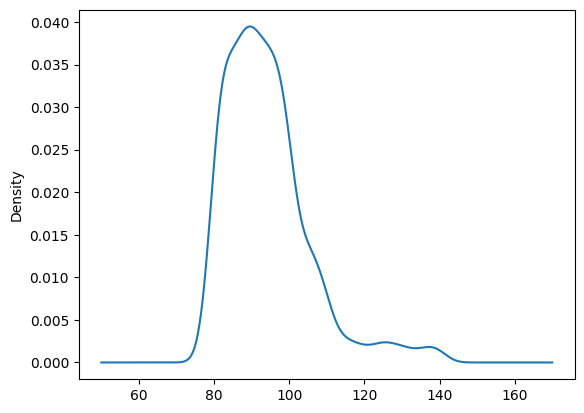

In [223]:
df['bloodpressure'].plot(kind='kde')

<Axes: >

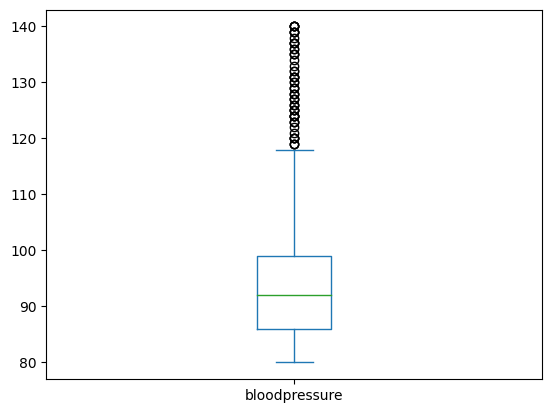

In [224]:
df['bloodpressure'].plot(kind='box')

##*Claim*

In [225]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Frequency'>

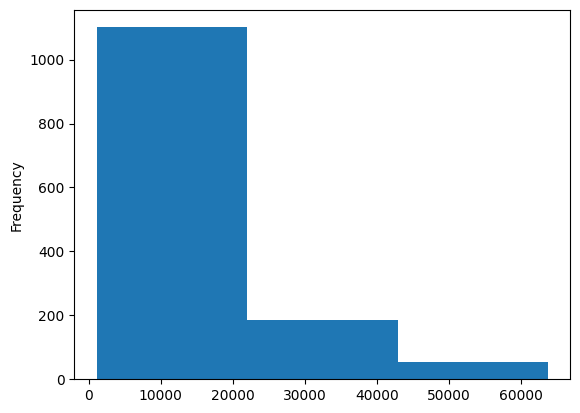

In [226]:
df['claim'].plot(kind='hist', bins=3)

<Axes: ylabel='Density'>

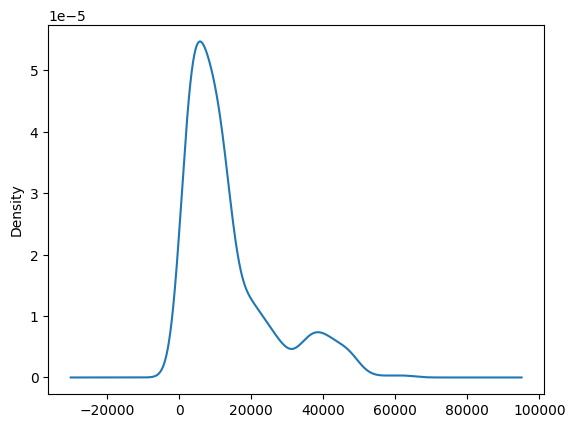

In [227]:
df['claim'].plot(kind='kde')

<Axes: >

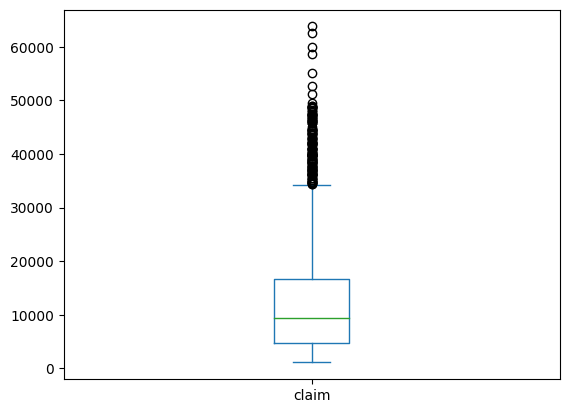

In [228]:
df['claim'].plot(kind='box')

In [229]:
new= df['claim'].cumsum()
print(new)

0           1121.87
1           2253.38
2           3389.32
3           4525.72
4           5662.73
           ...     
1335    17513723.39
1336    17572294.46
1337    17632315.86
1338    17694908.73
1339    17758679.16
Name: claim, Length: 1340, dtype: float64


In [230]:
df['claim'].isnull().sum()

0

## *Gender*

In [231]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

## *Diabetic*

In [232]:
df['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

In [233]:
df['diabetic'].isnull().sum()

0

##*Region*

In [234]:
df['region'].value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

In [235]:
df['region'].isnull().sum()

3

##*Children*

In [236]:
df['children'].value_counts()

children
0    576
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [237]:
df['children'].isnull().sum()

0

<Axes: ylabel='count'>

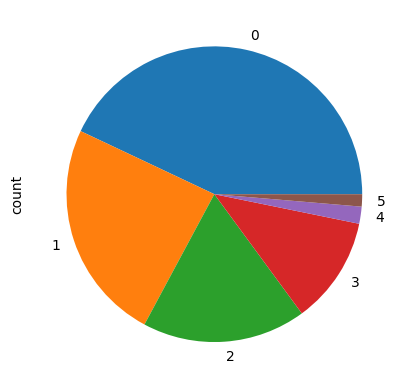

In [238]:
df['children'].value_counts().plot(kind='pie')

## *Smoker*
1 in every 5 person is smoker

In [239]:
df['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: ylabel='count'>

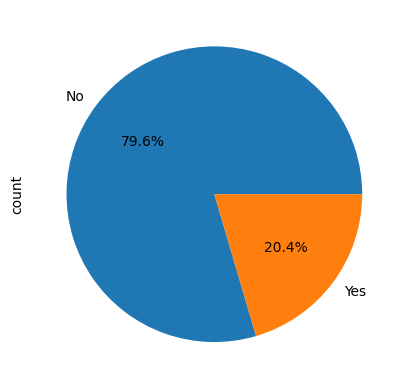

In [240]:
df['smoker'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [241]:
df['smoker'].isnull().sum()

0

In [242]:

df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


# **BIVARIATE ANALYSIS**

## *Gender and Age*

<Axes: ylabel='Frequency'>

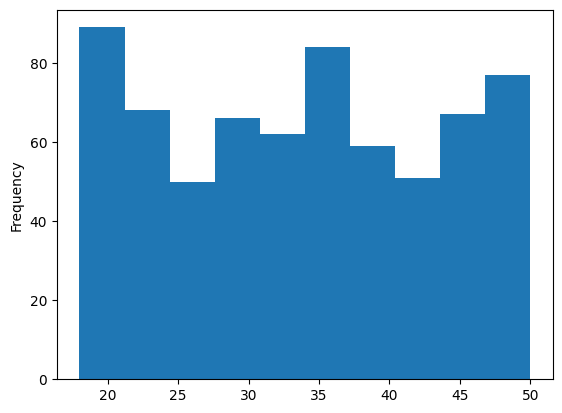

In [243]:
df[df['gender']=='male'].age.plot(kind='hist')

<Axes: ylabel='Frequency'>

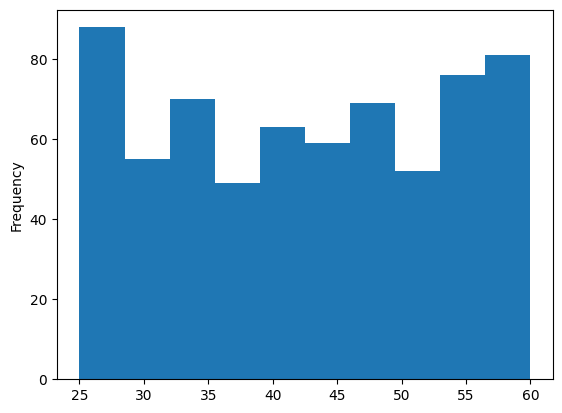

In [244]:
df[df['gender']=='female'].age.plot(kind='hist')

## *Age and claim*
* Doesn't show any Particular relation

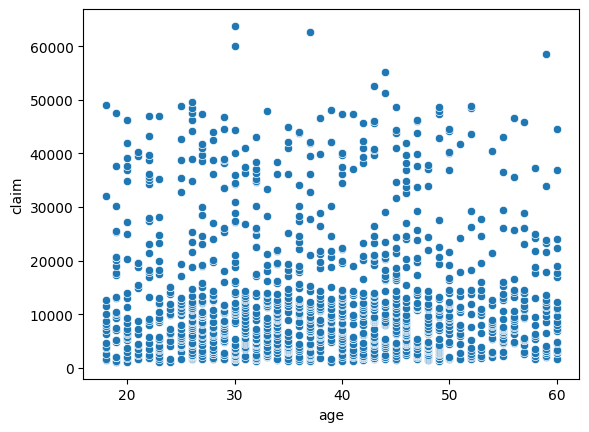

In [245]:
plot= sns.scatterplot(x='age', y='claim', data=df )

##*Age and BMI*
* no strong realtion

<Axes: xlabel='age', ylabel='bmi'>

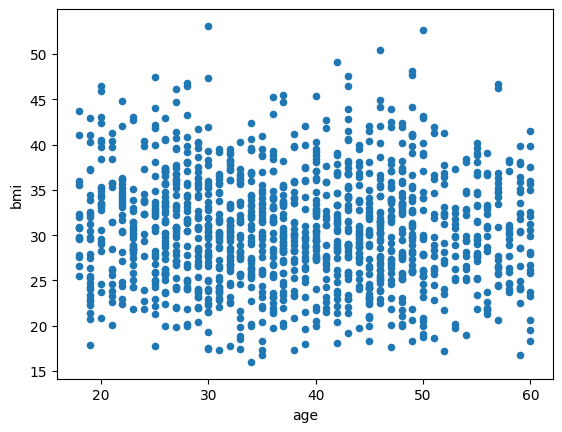

In [246]:
df.plot(kind='scatter', x='age', y='bmi')

## *Gender and claim*
* Female Claim at low level and male claim at high level

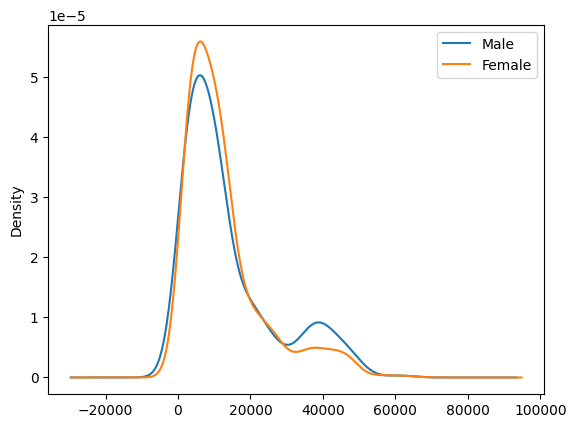

In [247]:
df[df['gender']=='male'].claim.plot(kind='kde', label= 'Male')
df[df['gender']=='female'].claim.plot(kind='kde', label='Female')
plt.legend()

## *BMI and Claim*
* Lower than 30 BMI are unlikely to claim high
* higher BMI has chances for high claim

<Axes: xlabel='bmi', ylabel='claim'>

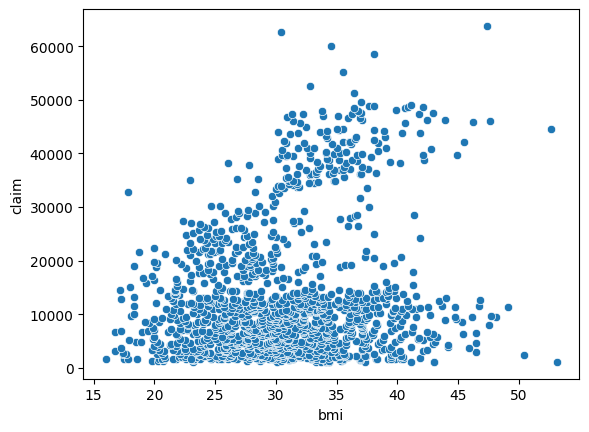

In [248]:
sns.scatterplot(x='bmi', y='claim', data=df)

##*BMI and Gender*
* Males have slightly higher BMI than female

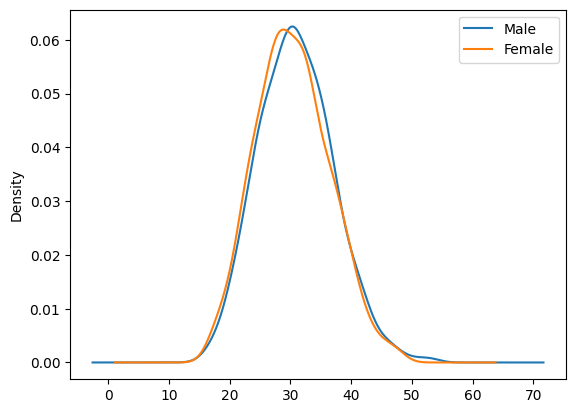

In [249]:
df[df['gender']=='male'].bmi.plot(kind='kde', label='Male')
df[df['gender']=='female'].bmi.plot(kind='kde', label='Female')
plt.legend()

## *Bloodpressure and Claim*
* Above 110 Bloodpressure , are most likely to claim above 30,000

<Axes: xlabel='bloodpressure', ylabel='claim'>

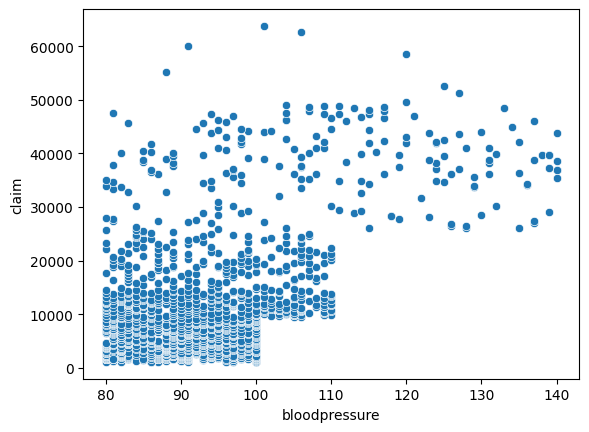

In [250]:
sns.scatterplot(x='bloodpressure', y='claim', data=df)

##*Bloodpressure and diabetic*
* Diabetic people have comparitevly less blood pressure

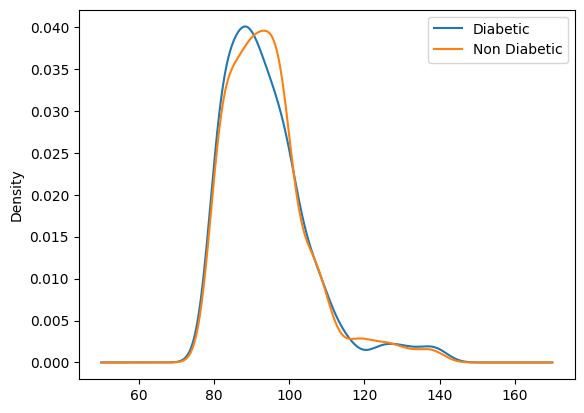

In [251]:
df[df['diabetic']=='Yes'].bloodpressure.plot(kind='kde', label='Diabetic')
df[df['diabetic']=='No'].bloodpressure.plot(kind='kde', label='Non Diabetic')
plt.legend()

##*Bloodpressure and BMI*
* Lower BMI, are likely to have lower blood pressure

<Axes: xlabel='bmi', ylabel='bloodpressure'>

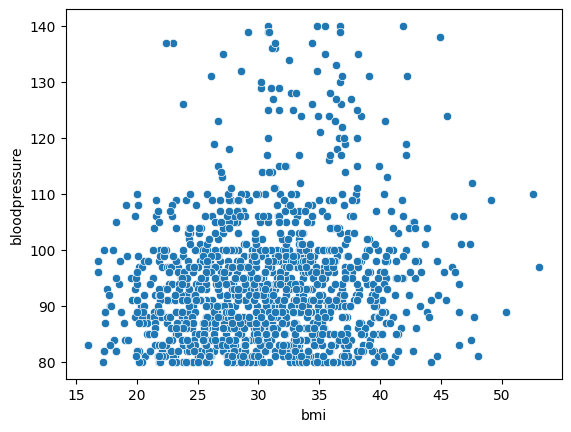

In [252]:
sns.scatterplot(x='bmi', y='bloodpressure', data=df)

## *Diabetic and Claim*

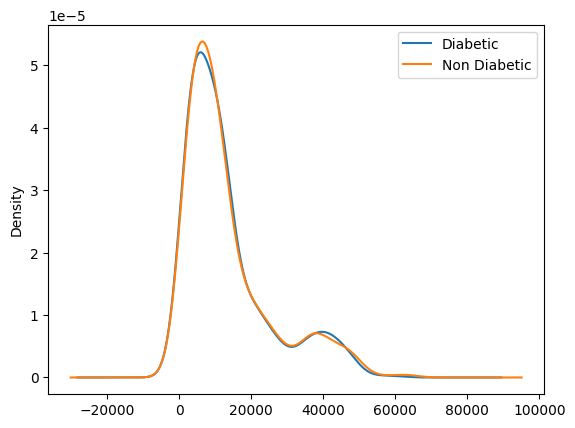

In [253]:
df[df['diabetic']=='Yes'].claim.plot(kind='kde', label='Diabetic')
df[df['diabetic']=='No'].claim.plot(kind='kde', label='Non Diabetic')
plt.legend()

##*Diabetics and Gender*

<Axes: ylabel='count'>

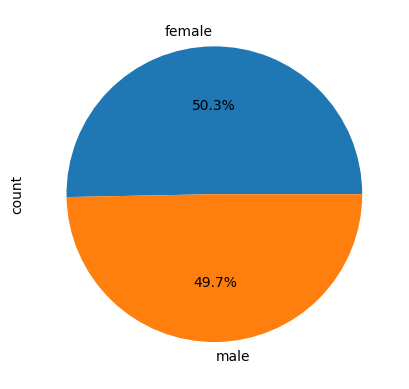

In [254]:
df[df['diabetic']=='Yes'].gender.value_counts().plot(kind='pie', autopct='%.1f%%')

##*Region and claim*
* North East have claim more than avergage
* all except northwest have claimed high at some proportion

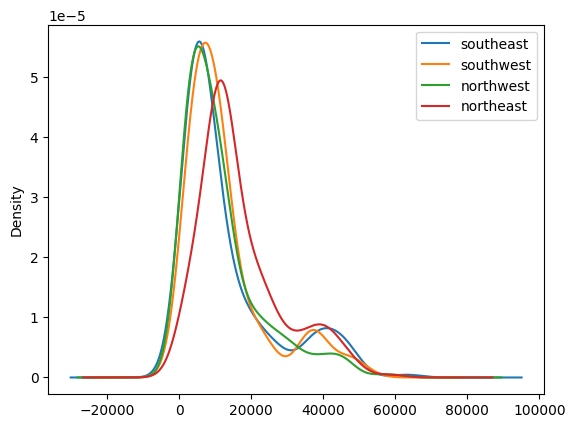

In [255]:
df[df['region']=='southeast'].claim.plot(kind='kde', label='southeast')
df[df['region']=='southwest'].claim.plot(kind='kde', label='southwest')
df[df['region']=='northwest'].claim.plot(kind='kde', label='northwest')
df[df['region']=='northeast'].claim.plot(kind='kde', label='northeast')
plt.legend()

##*Region and Smoker*
* Southeast have higest smokers
* Although 30% of northeast region people are smokers, highest in any population



<Axes: ylabel='count'>

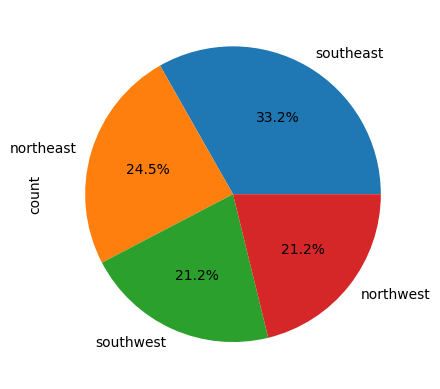

In [256]:
df[df['smoker']=='Yes'].region.value_counts().plot(kind='pie', autopct='%.1f%%')

In [257]:
pd.crosstab( df['region'],df['smoker'], normalize='index')

smoker,No,Yes
region,,
northeast,0.709957,0.290043
northwest,0.833811,0.166189
southeast,0.794582,0.205418
southwest,0.815287,0.184713


<Axes: xlabel='region'>

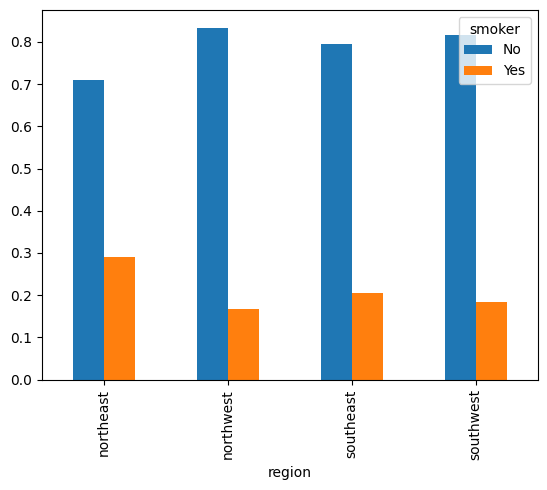

In [258]:
pd.crosstab( df['region'],df['smoker'], normalize='index').plot(kind='bar')

## *Smoker and Claim*

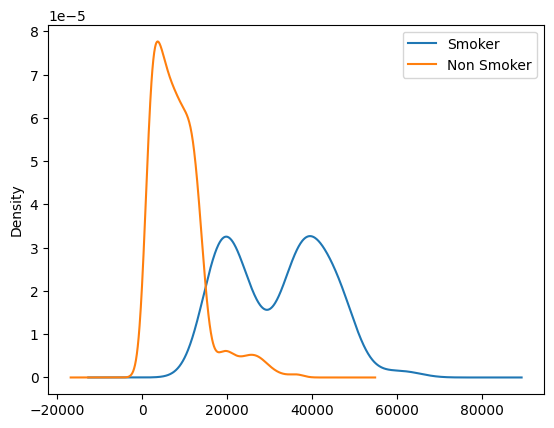

In [259]:
df[df['smoker']=='Yes'].claim.plot(kind='kde', label='Smoker')
df[df['smoker']=='No'].claim.plot(kind='kde', label='Non Smoker')
plt.legend()

## *Smoker and Bloodpressure*

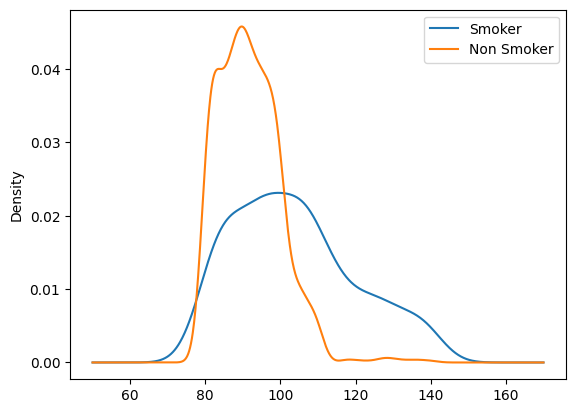

In [260]:
df[df['smoker']=='Yes'].bloodpressure.plot(kind='kde', label='Smoker')
df[df['smoker']=='No'].bloodpressure.plot(kind='kde', label='Non Smoker')
plt.legend()

##*Smoker and BMI*

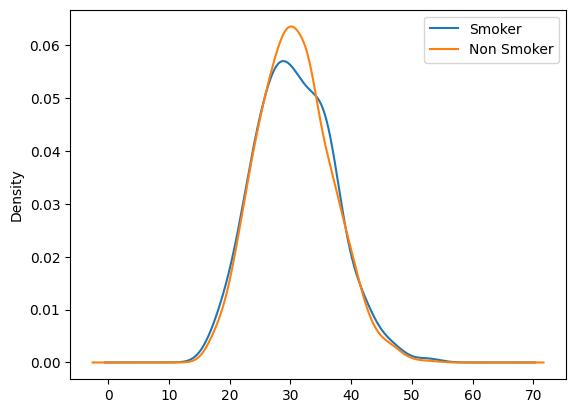

In [261]:
df[df['smoker']=='Yes'].bmi.plot(kind='kde', label='Smoker')
df[df['smoker']=='No'].bmi.plot(kind='kde', label='Non Smoker')
plt.legend()

##*Smoker and gender*

<Axes: ylabel='count'>

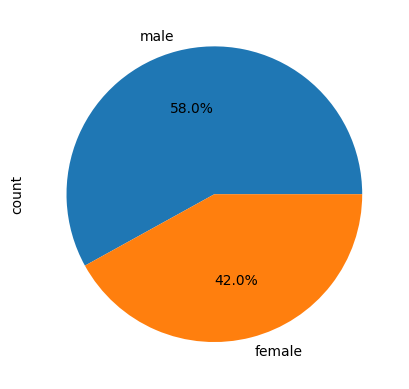

In [262]:
df[df['smoker']=='Yes'].gender.value_counts().plot(kind='pie', autopct='%.1f%%')

## *Children and Claim*

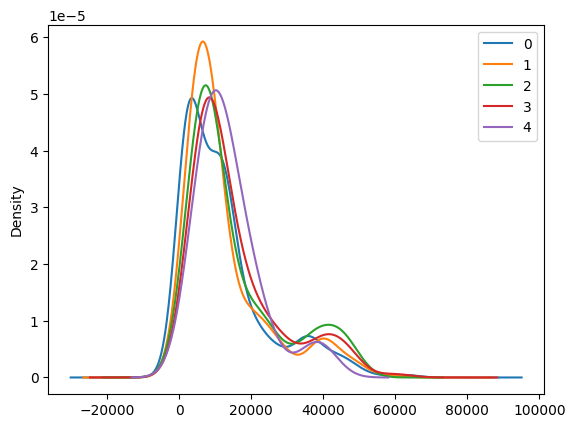

In [263]:
df[df['children']==0].claim.plot(kind='kde', label='0')
df[df['children']==1].claim.plot(kind='kde', label='1')
df[df['children']==2].claim.plot(kind='kde', label='2')
df[df['children']==3].claim.plot(kind='kde', label='3')
df[df['children']==4].claim.plot(kind='kde', label='4')
# df[df['children']==5].claim.plot(kind='kde', label='5')
plt.legend()

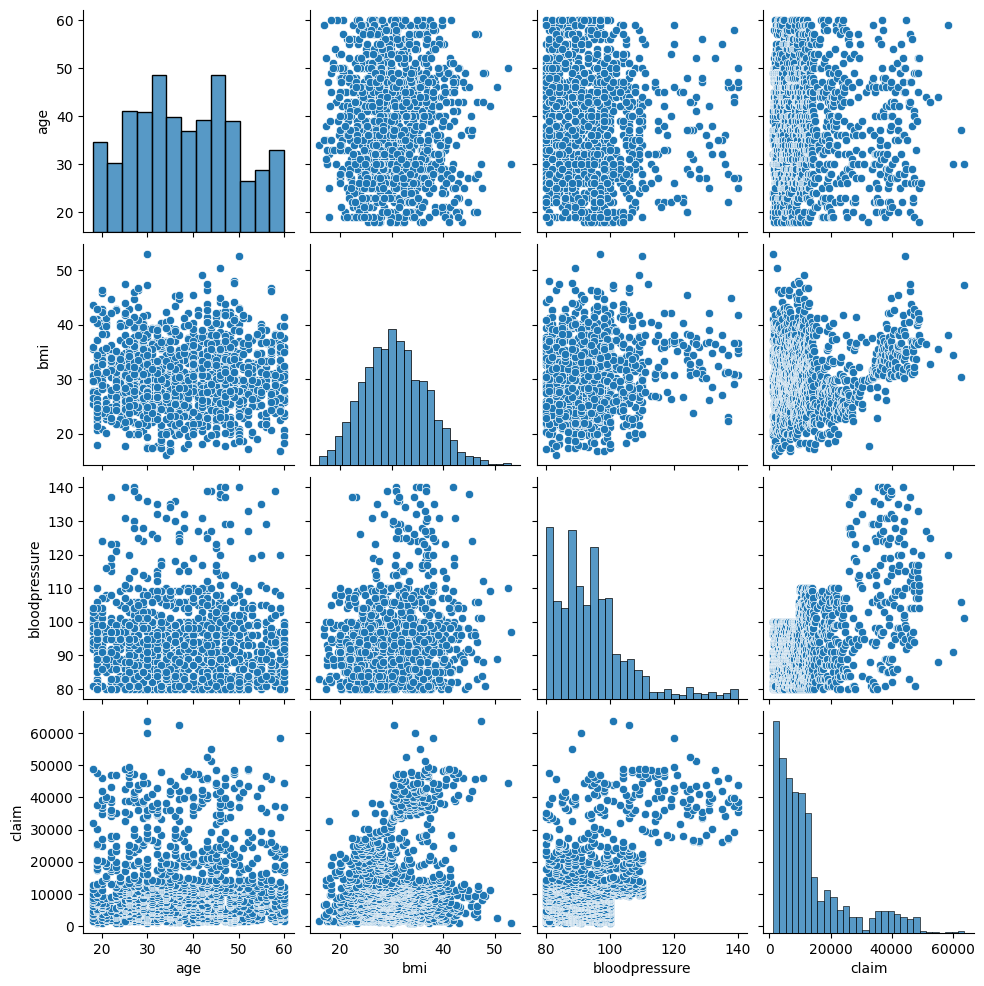

In [264]:
sns.pairplot(df[['age', 'bmi', 'bloodpressure', 'claim']])
plt.show()


># Distributing Claim Amount into categories

## Claim level

In [265]:
def transform_claim(amt):
  if amt>=40000:
    return 'High'
  elif amt>=20000:
    return 'Medium'
  else:
    return 'Low'

In [266]:
df['claim_level']= df['claim'].apply(transform_claim)

In [267]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,claim_level
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Low
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Low
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Low
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,Low
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,High
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,High
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,High
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,High


In [268]:
df['claim_level'].value_counts()

claim_level
Low       1067
Medium     194
High        79
Name: count, dtype: int64

<Axes: ylabel='count'>

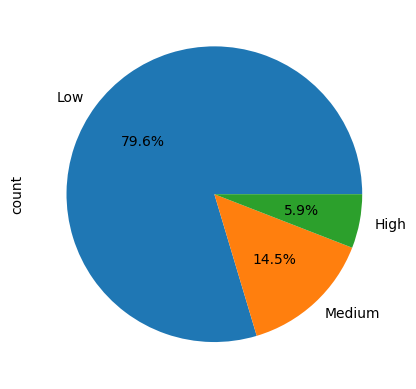

In [269]:
df['claim_level'].value_counts().plot(kind='pie', autopct='%.1f%%')

## *Gender and claim level*
###Conclusion
* Male claim comparitively higher than females

In [270]:
pd.crosstab( df['gender'],df['claim_level'])

claim_level,High,Low,Medium
gender,,,
female,32,547,83
male,47,520,111


In [271]:
pd.crosstab( df['gender'],df['claim_level'], normalize='index')

claim_level,High,Low,Medium
gender,,,
female,0.048338,0.826284,0.125378
male,0.069322,0.766962,0.163717


In [272]:
pd.crosstab( df['gender'],df['claim_level'], normalize='columns')

claim_level,High,Low,Medium
gender,,,
female,0.405063,0.512652,0.427835
male,0.594937,0.487348,0.572165


<Axes: xlabel='gender'>

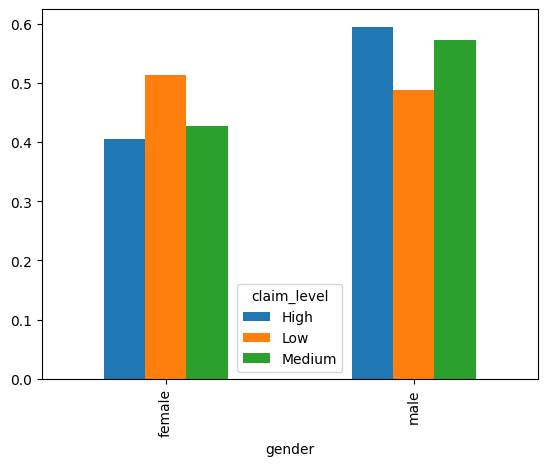

In [273]:
pd.crosstab( df['gender'],df['claim_level'], normalize='columns').plot(kind='bar')

## *Smoker and claim level*
###Conclusion
* 94% of Non-Smoker claim at low level

* Only 20% of smokers claim at low level, 30% smokers claim high, 50% claim medium insurance

In [274]:
pd.crosstab( df['smoker'],df['claim_level'], normalize='index')

claim_level,High,Low,Medium
smoker,,,
No,0.000000,0.942777,0.057223
Yes,0.288321,0.226277,0.485401


In [275]:
pd.crosstab( df['smoker'],df['claim_level'], normalize='columns')

claim_level,High,Low,Medium
smoker,,,
No,0.0,0.941893,0.314433
Yes,1.0,0.058107,0.685567


<Axes: xlabel='smoker'>

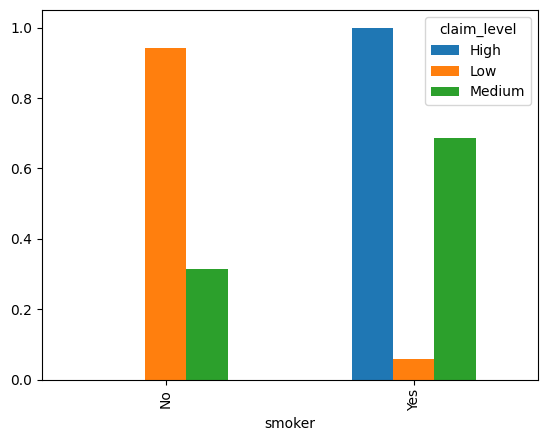

In [276]:
pd.crosstab( df['smoker'],df['claim_level'], normalize='columns').plot(kind='bar')

## *Children and claim level*
* Having 2 or 3 children sligthly incresed chances of high claim

In [277]:
pd.crosstab( df['children'],df['claim_level'])

claim_level,High,Low,Medium
children,,,
0,26,468,82
1,18,260,46
2,21,179,40
3,13,121,23
4,1,21,3
5,0,18,0


In [278]:
pd.crosstab( df['children'],df['claim_level'], normalize='index')*100

claim_level,High,Low,Medium
children,,,
0,4.513889,81.250000,14.236111
1,5.555556,80.246914,14.197531
2,8.750000,74.583333,16.666667
3,8.280255,77.070064,14.649682
4,4.000000,84.000000,12.000000
5,0.000000,100.000000,0.000000


<Axes: xlabel='children'>

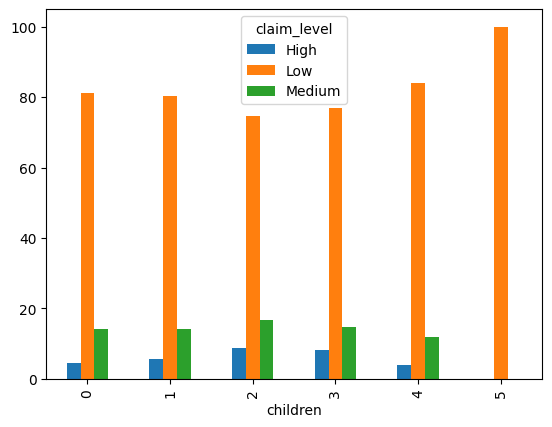

In [279]:
(pd.crosstab( df['children'],df['claim_level'], normalize='index')*100).plot(kind='bar')

## *Region and claim level*
* Southeast region people have more high claim, but it could be due to more number of data of southeast
* North East people have the lowest rate of low claim amongst all.

In [280]:
pd.crosstab( df['region'],df['claim_level'])

claim_level,High,Low,Medium
region,,,
northeast,15,163,53
northwest,14,288,47
southeast,36,355,52
southwest,14,258,42


In [281]:
pd.crosstab( df['region'],df['claim_level'], normalize='index')*100

claim_level,High,Low,Medium
region,,,
northeast,6.493506,70.562771,22.943723
northwest,4.011461,82.521490,13.467049
southeast,8.126411,80.135440,11.738149
southwest,4.458599,82.165605,13.375796


<Axes: xlabel='region'>

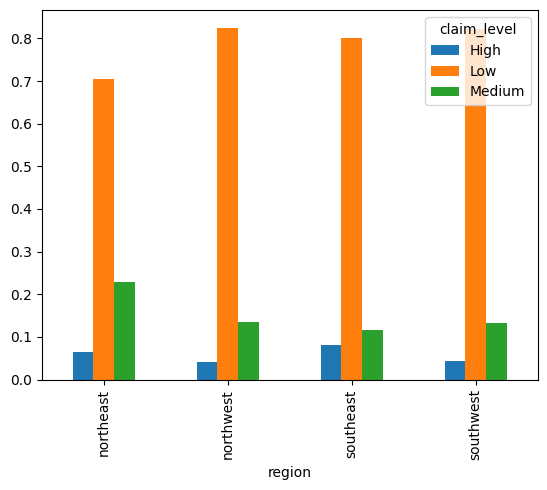

In [282]:
pd.crosstab( df['region'],df['claim_level'], normalize='index').plot(kind='bar')

In [283]:
pd.crosstab( df['region'],df['claim_level'], normalize='columns')*100

claim_level,High,Low,Medium
region,,,
northeast,18.987342,15.319549,27.319588
northwest,17.721519,27.067669,24.226804
southeast,45.569620,33.364662,26.804124
southwest,17.721519,24.248120,21.649485


<Axes: xlabel='region'>

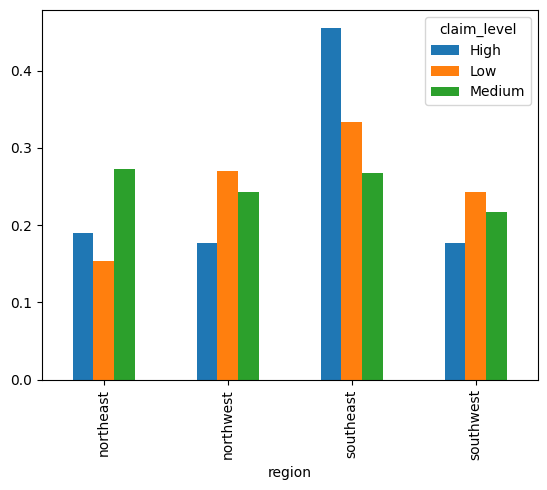

In [284]:
pd.crosstab( df['region'],df['claim_level'], normalize='columns').plot(kind='bar')

## *Age and claim level*
* People of young age are likely to claim low or medium, while people above 40 ask for higher claims

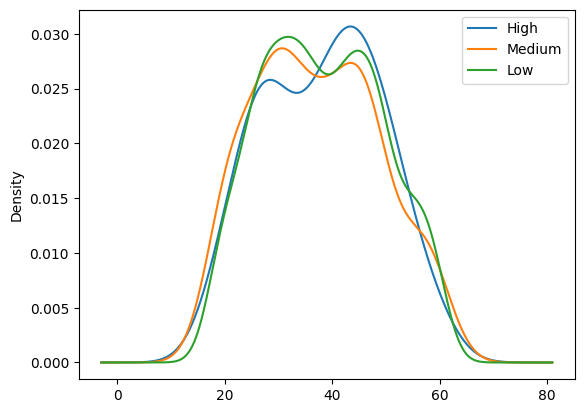

In [285]:
df[df['claim_level']=='High'].age.plot(kind='kde', label='High')
df[df['claim_level']=='Medium'].age.plot(kind='kde', label= 'Medium')
df[df['claim_level']=='Low'].age.plot(kind='kde', label='Low')
plt.legend()

##*Age and Region*
* There are less young people in northeast
* South east has slightly higher old age people

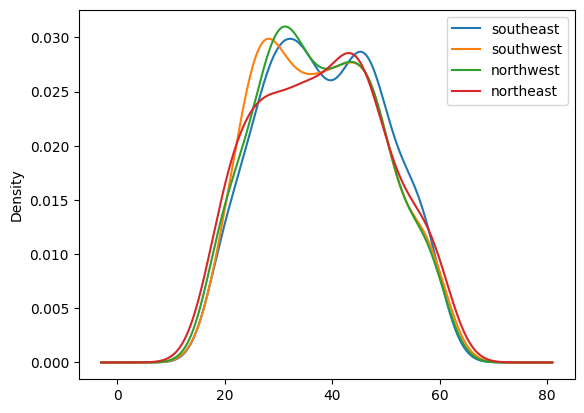

In [286]:
df[df['region']=='southeast'].age.plot(kind='kde', label='southeast')
df[df['region']=='southwest'].age.plot(kind='kde', label='southwest')
df[df['region']=='northwest'].age.plot(kind='kde', label='northwest')
df[df['region']=='northeast'].age.plot(kind='kde', label='northeast')
plt.legend()

##*BMI and claim Level*
* Higehr BMI will mostly have high claim

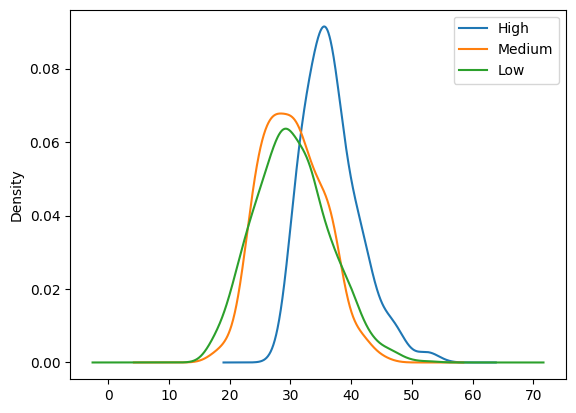

In [287]:
df[df['claim_level']=='High'].bmi.plot(kind='kde', label='High')
df[df['claim_level']=='Medium'].bmi.plot(kind='kde', label= 'Medium')
df[df['claim_level']=='Low'].bmi.plot(kind='kde', label='Low')
plt.legend()

##*BMI and region*
* SouthEast poeple have comparitivelt higher BMI rate


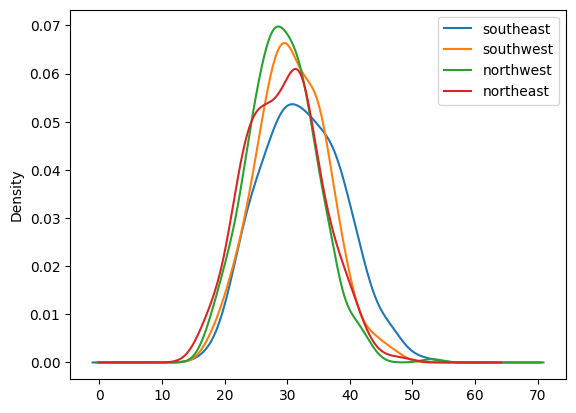

In [288]:
df[df['region']=='southeast'].bmi.plot(kind='kde', label='southeast')
df[df['region']=='southwest'].bmi.plot(kind='kde', label='southwest')
df[df['region']=='northwest'].bmi.plot(kind='kde', label='northwest')
df[df['region']=='northeast'].bmi.plot(kind='kde', label='northeast')
plt.legend()

##*Bloodpressure and Region*
* NorthEast have high % of bloodpressure from 110-120

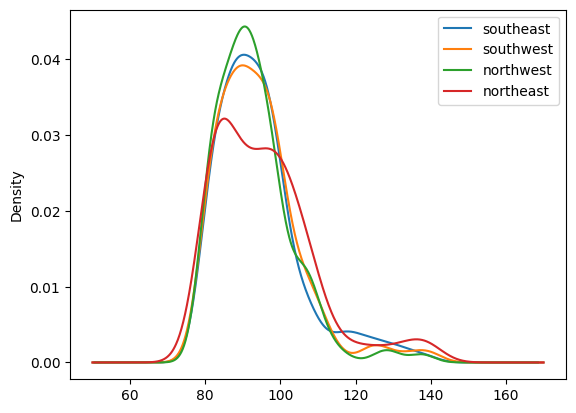

In [289]:
df[df['region']=='southeast'].bloodpressure.plot(kind='kde', label='southeast')
df[df['region']=='southwest'].bloodpressure.plot(kind='kde', label='southwest')
df[df['region']=='northwest'].bloodpressure.plot(kind='kde', label='northwest')
df[df['region']=='northeast'].bloodpressure.plot(kind='kde', label='northeast')
plt.legend()

##*Blood pressure and claim level*
* HIgh blood pressure people have asked for higher claims
* No person with low bloodpressure has taken high claim

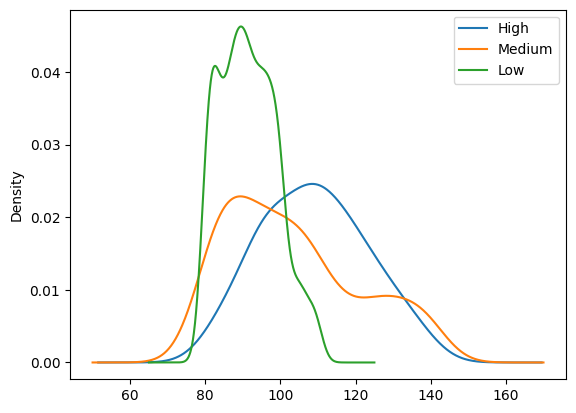

In [290]:
df[df['claim_level']=='High'].bloodpressure.plot(kind='kde', label='High')
df[df['claim_level']=='Medium'].bloodpressure.plot(kind='kde', label= 'Medium')
df[df['claim_level']=='Low'].bloodpressure.plot(kind='kde', label='Low')
plt.legend()

##*Diabetic and claim Level*
* Both have equal dynamics

<Axes: ylabel='count'>

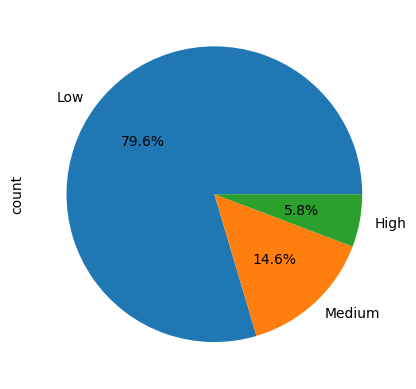

In [291]:
df[df['diabetic']=='Yes'].claim_level.value_counts().plot(kind='pie', autopct='%.1f%%')

<Axes: ylabel='count'>

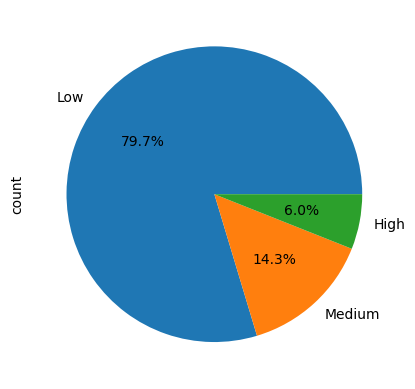

In [292]:
df[df['diabetic']=='No'].claim_level.value_counts().plot(kind='pie', autopct='%.1f%%')

##*Diabetic and Region*
* Northwest people have 44% chance of diabetics, while northeast have 52% chance

In [293]:
pd.crosstab( df['diabetic'],df['region'], normalize='columns')

region,northeast,northwest,southeast,southwest
diabetic,,,,
No,0.47619,0.550143,0.507901,0.541401
Yes,0.52381,0.449857,0.492099,0.458599


##*Gender and region*
There are slighly higher female/male ratio in northwest

In [294]:
pd.crosstab( df['gender'],df['region'], normalize='columns')

region,northeast,northwest,southeast,southwest
gender,,,,
female,0.484848,0.469914,0.505643,0.515924
male,0.515152,0.530086,0.494357,0.484076


##*Children and region*

In [295]:
pd.crosstab( df['children'],df['region'], normalize='columns')*100

region,northeast,northwest,southeast,southwest
children,,,,
0,45.454545,44.126074,41.986456,40.764331
1,24.675325,21.776504,25.733634,24.522293
2,16.017316,18.911175,18.058691,18.152866
3,10.822511,13.180516,11.060948,11.783439
4,2.597403,1.719198,1.354402,2.229299
5,0.432900,0.286533,1.805869,2.547771


>## Prediction model


In [296]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
claim_level      0
dtype: int64

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [298]:
X = df.drop(columns=['index', 'PatientID', 'claim'])
y = df['claim']

In [299]:
numeric_features = ['age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

In [300]:
categorical_features = ['gender', 'diabetic', 'smoker', 'region']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])


In [301]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [302]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [303]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'diabetic',
                                                   'smoker', 'region'])])),
                ('regressor', LinearRegression())])

In [306]:
y_pred = model.predict(X_test)


In [307]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(5490.138609677883, 53556645.19215744, 0.6740257810265251)

In [310]:
# Predict the claim value for the new input
new_data = pd.DataFrame({
    'age': [55.0],
    'gender': ['female'],
    'bmi': [40.0],
    'bloodpressure': [80],
    'diabetic': ['No'],
    'children': [3],
    'smoker': ['Yes'],
    'region': ['northeast']
})


new_pred = model.predict(new_data)
new_pred[0]

33314.10551785278